Due to the unique way of storing conditions in the NIH dataset (as a string with a pipe separator), we need to pre-process the data to make it easier to work with. The first cell will attempt to do this.

In [8]:
import pandas as pd

conditions = [
    'Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 'Nodule',
    'Pneumonia', 'Pneumothorax', 'Consolidation', 'Edema', 'Emphysema', 'Fibrosis',
    'Pleural_Thickening', 'Hernia', 'No Finding'
]

input_file = r'D:\FYP Backup\NIH Chest\Data_Entry_2017.csv'
df = pd.read_csv(input_file)


for condition in conditions:
    df[condition] = 0


for index, row in df.iterrows():
    labels = row['Finding Labels'].split('|')
    for label in labels:
        if label in conditions:
            df.at[index, label] = 1

output_file = r'E:\FYP Repos\NIH Foundation Model\Data\NIH_Chest_XRays_Conditions.csv'
df.to_csv(output_file, index=False)

print(f'New CSV file with condition columns saved to: {output_file}')

New CSV file with condition columns saved to: E:\FYP Repos\NIH Foundation Model\Data\NIH_Chest_XRays_Conditions.csv


Next up I want to remove all rows with missing values and where the view position is not PA. Also removing rows where the patient has had more than 2 follow ups to prevent overfitting.

In [17]:
import pandas as pd

input_file = r'E:\FYP Repos\NIH Foundation Model\Data\NIH_Chest_XRays_Conditions.csv'
df = pd.read_csv(input_file)

df_filtered = df[(df['View Position'] == 'PA') & df['View Position'].notna() & df['Patient Age'].notna() & df['Patient Gender'].notna()]
df_filtered = df_filtered[df_filtered['Follow-up #'] <= 1]


output_file = r'E:\FYP Repos\NIH Foundation Model\Data\NIH_Chest_XRays_Conditions_PA_Filtered.csv'
df_filtered.to_csv(output_file, index=False)

print(f'Filtered CSV file saved to: {output_file}')

Filtered CSV file saved to: E:\FYP Repos\NIH Foundation Model\Data\NIH_Chest_XRays_Conditions_PA_Filtered.csv


I have manually identified 8 patients over the age of 120, I have opted to manually remove tem from the dataset as I have done for the other ones.

Next up I want some stats to breakdown the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

input_file = r'E:\FYP Repos\NIH Foundation Model\Data\NIH_Chest_XRays_Conditions_PA_Filtered.csv'
df = pd.read_csv(input_file)

# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Patient Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Patient Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Patient Age'], bins=30, kde=True)
plt.title('Patient Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\FYP Repos\\NIH Foundation Model\\Data\\NIH_Chest_XRays_Conditions_PA_Filtered.csv'

Number of Each Condition Present:
No Finding            24210.0
Infiltration           4271.0
Nodule                 2057.0
Atelectasis            1991.0
Effusion               1672.0
Mass                   1530.0
Pleural_Thickening      953.0
Cardiomegaly            864.0
Fibrosis                739.0
Consolidation           492.0
Pneumothorax            375.0
Emphysema               314.0
Pneumonia               233.0
Hernia                  113.0
Edema                    52.0
dtype: float64


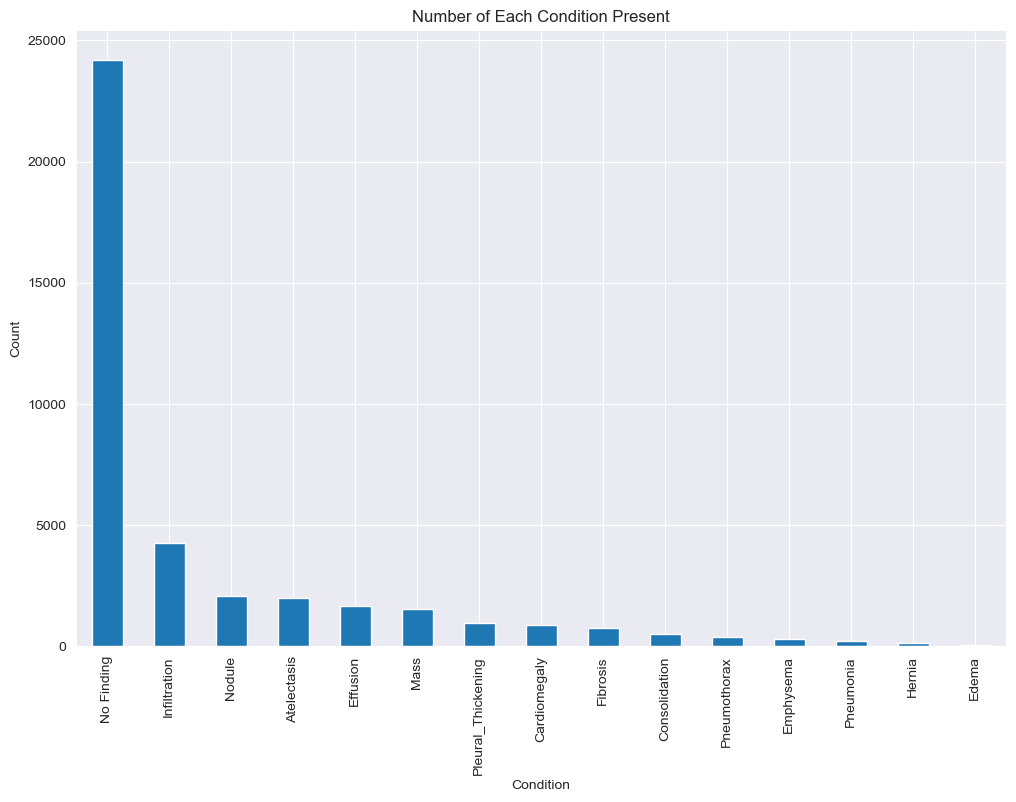


Number of Each Condition Present Excluding 'No Finding':
Infiltration          4271.0
Nodule                2057.0
Atelectasis           1991.0
Effusion              1672.0
Mass                  1530.0
Pleural_Thickening     953.0
Cardiomegaly           864.0
Fibrosis               739.0
Consolidation          492.0
Pneumothorax           375.0
Emphysema              314.0
Pneumonia              233.0
Hernia                 113.0
Edema                   52.0
dtype: float64


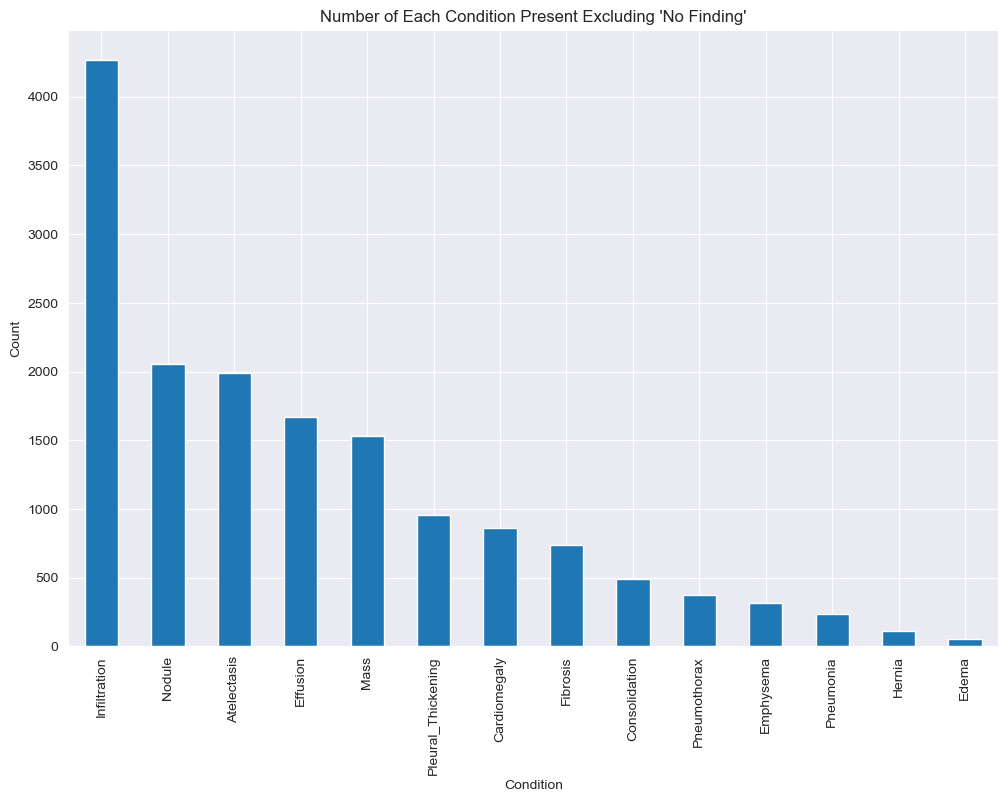

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

input_file = r'E:\FYP Repos\NIH Foundation Model\Data\NIH_Chest_XRays_Conditions_PA_Filtered.csv'
df = pd.read_csv(input_file)

conditions = [
    'Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 'Nodule',
    'Pneumonia', 'Pneumothorax', 'Consolidation', 'Edema', 'Emphysema', 'Fibrosis',
    'Pleural_Thickening', 'Hernia', 'No Finding'
]

# Number of Each Condition Present
condition_counts = df[conditions].sum().sort_values(ascending=False)
print("Number of Each Condition Present:")
print(condition_counts)

plt.figure(figsize=(12, 8))
condition_counts.plot(kind='bar')
plt.title('Number of Each Condition Present')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

# Number of Each Condition Present Excluding 'No Finding'
conditions_excluding_no_finding = [
    'Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 'Nodule',
    'Pneumonia', 'Pneumothorax', 'Consolidation', 'Edema', 'Emphysema', 'Fibrosis',
    'Pleural_Thickening', 'Hernia'
]

condition_counts_excluding_no_finding = df[conditions_excluding_no_finding].sum().sort_values(ascending=False)
print("\nNumber of Each Condition Present Excluding 'No Finding':")
print(condition_counts_excluding_no_finding)

plt.figure(figsize=(12, 8))
condition_counts_excluding_no_finding.plot(kind='bar')
plt.title('Number of Each Condition Present Excluding \'No Finding\'')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

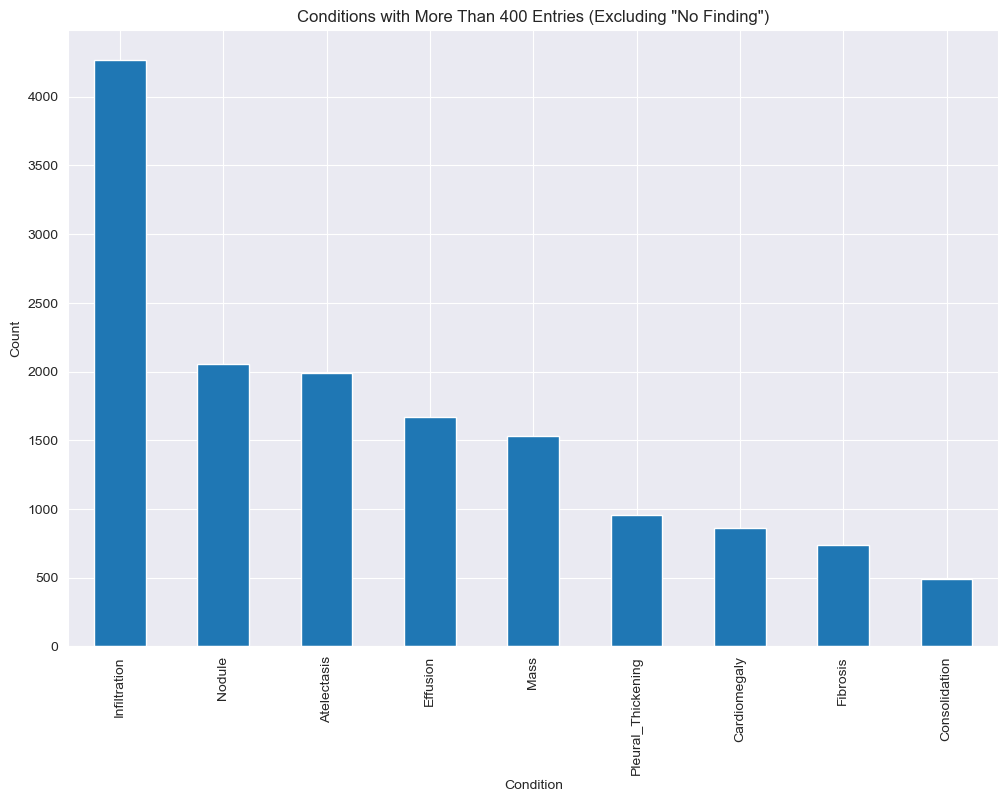

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

input_file = r'E:\FYP Repos\NIH Foundation Model\Data\NIH_Chest_XRays_Conditions_PA_Filtered.csv'
df = pd.read_csv(input_file)

# Define the possible conditions excluding 'No Finding'
conditions_excluding_no_finding = [
    'Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 'Nodule',
    'Pneumonia', 'Pneumothorax', 'Consolidation', 'Edema', 'Emphysema', 'Fibrosis',
    'Pleural_Thickening', 'Hernia'
]

# Count the occurrences of each condition
condition_counts = df[conditions_excluding_no_finding].sum().sort_values(ascending=False)

# Filter out conditions with less than 400 entries
filtered_condition_counts = condition_counts[condition_counts >= 400]

# Plot the filtered conditions
plt.figure(figsize=(12, 8))
filtered_condition_counts.plot(kind='bar')
plt.title('Conditions with More Than 400 Entries (Excluding "No Finding")')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()